In [1]:
# Importar dados preparados
# ============================================================
# 1️⃣ Importação das Bibliotecas e Carregamento dos Dados
# ============================================================
import pandas as pd
import numpy as np
import joblib
import os

# Bibliotecas de pré-processamento e modelagem
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Bibliotecas para visualização
import matplotlib.pyplot as plt
import seaborn as sns

# Configurações
import warnings
warnings.filterwarnings("ignore")
print("✅ Bibliotecas carregadas.")

# --- Importar dados preparados ---
DATA_PATH = "../data/model_inputs/model_input.csv"
df = pd.read_csv(DATA_PATH)
df = df.dropna() # Limpeza inicial, removendo linhas com valores nulos

print(f"✅ Dataset carregado com sucesso: {df.shape[0]} linhas, {df.shape[1]} colunas.")
display(df.head())

✅ Bibliotecas carregadas.
✅ Dataset carregado com sucesso: 15 linhas, 18 colunas.


,nome_ponto_turistico_clima,provincia_clima,lat_clima,lon_clima,temp_med_anual,precipitacao_anual,ndvi,evi,ndwi,altitude,populacao,densidade_pop,pib_per_capita,idh,taxa_urbanizacao,emprego_turismo,distancia_estrada_principal_km,distancia_cidade_km
0,Quedas de Calandula,Malanje,-9.075025,16.001131,28.8,218.9,0.80,0.16,0.02,287.0,95533,412.4,4015.12,0.543,50.1,14.0,2.7,157.6
1,Miradouro da Lua,Luanda,-9.221147,13.090001,24.8,304.1,0.77,0.68,0.08,1148.0,52641,422.9,2765.22,0.590,69.3,13.1,1.4,11.0
2,Museu Kulumbimbi,Zaire,-6.264389,14.245581,27.8,343.0,0.20,0.46,0.08,683.0,54008,151.1,1998.99,0.726,41.5,12.5,6.0,38.5
3,Reserva Parcial do Namibe,Namibe,-15.766760,12.399914,24.3,286.7,0.15,0.60,0.04,362.0,166079,200.8,1815.76,0.624,44.9,7.5,6.6,106.4
4,Fortaleza de São Miguel,Luanda,-8.808343,13.223445,28.1,158.6,0.62,0.47,0.16,1192.0,192436,250.0,3426.64,0.678,70.6,8.8,4.3,129.0


In [2]:
# Definir variáveis 
# ============================================================
# 2️⃣ Definição das Variáveis e Pipeline de Pré-processamento
# ============================================================

# --- Definir variáveis (Features e Target) ---
X = df.drop(columns=['idh'])
y = df['idh']

# Identificar automaticamente as colunas por tipo de dado
numeric_features = X.select_dtypes(include=np.number).columns.tolist()
categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()

print(f"📊 Features Numéricas Identificadas: {numeric_features}")
print(f"📝 Features Categóricas Identificadas: {categorical_features}\n")

# --- Criar o pré-processador com ColumnTransformer ---
# Esta é a maneira correta de aplicar diferentes transformações a diferentes colunas.
preprocessor = ColumnTransformer(
    transformers=[
        # Pipeline para features numéricas: aplicar escalonamento
        ('num', StandardScaler(), numeric_features),
        
        # Pipeline para features categóricas: aplicar One-Hot Encoding
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

print("✅ Pré-processador definido com sucesso.")

📊 Features Numéricas Identificadas: ['lat_clima', 'lon_clima', 'temp_med_anual', 'precipitacao_anual', 'ndvi', 'evi', 'ndwi', 'altitude', 'populacao', 'densidade_pop', 'pib_per_capita', 'taxa_urbanizacao', 'emprego_turismo', 'distancia_estrada_principal_km', 'distancia_cidade_km']
📝 Features Categóricas Identificadas: ['nome_ponto_turistico_clima', 'provincia_clima']

✅ Pré-processador definido com sucesso.


Dados divididos em 12 amostras de treino e 3 de teste.

✅ Modelo treinado com sucesso!

--- Desempenho do Modelo ---
📈 R² (Coeficiente de Determinação): 0.211
📉 RMSE (Raiz do Erro Quadrático Médio): 0.058


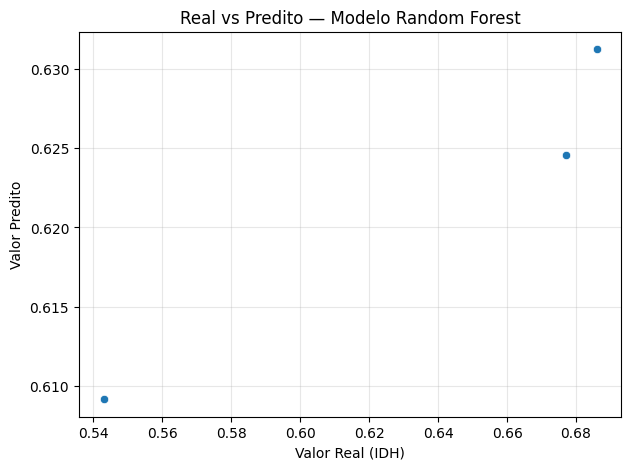

In [ ]:
# Treinar modelos
# ============================================================
# 3️⃣ Treinamento e Avaliação do Modelo
# ============================================================

# --- Dividir os dados em conjuntos de treino e teste ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Dados divididos em {len(X_train)} amostras de treino e {len(X_test)} de teste.\n")

# --- Criar o Pipeline final que une o pré-processador e o modelo ---
# O Pipeline garante que os mesmos passos de pré-processamento sejam aplicados
# de forma consistente durante o treino e a predição.
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(n_estimators=100, random_state=42))
])

# --- Treinar o modelo (o pipeline inteiro) ---
pipeline.fit(X_train, y_train)
print("✅ Modelo treinado com sucesso!")

# --- Avaliar o modelo no conjunto de teste ---
y_pred = pipeline.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"\n--- Desempenho do Modelo ---")
print(f"📈 R² (Coeficiente de Determinação): {r2:.3f}")
print(f"📉 RMSE (Raiz do Erro Quadrático Médio): {rmse:.3f}")

# Visualização: comparação real vs predito
plt.figure(figsize=(7, 5))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Valor Real (IDH)")
plt.ylabel("Valor Predito")
plt.title("Real vs Predito — Modelo Random Forest")
plt.grid(True, alpha=0.3)
plt.show()

📋 Informações gerais:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   nome_ponto_turistico_clima      15 non-null     object 
 1   provincia_clima                 15 non-null     object 
 2   lat_clima                       15 non-null     float64
 3   lon_clima                       15 non-null     float64
 4   temp_med_anual                  15 non-null     float64
 5   precipitacao_anual              15 non-null     float64
 6   ndvi                            15 non-null     float64
 7   evi                             15 non-null     float64
 8   ndwi                            15 non-null     float64
 9   altitude                        15 non-null     float64
 10  populacao                       15 non-null     int64  
 11  densidade_pop                   15 non-null     float64
 12  pib_per_capita  

,lat_clima,lon_clima,temp_med_anual,precipitacao_anual,ndvi,evi,ndwi,altitude,populacao,densidade_pop,pib_per_capita,idh,taxa_urbanizacao,emprego_turismo,distancia_estrada_principal_km,distancia_cidade_km
count,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
mean,-10.987630,14.759833,26.953333,258.920000,0.421333,0.430667,0.078667,657.600000,145009.733333,218.633333,2797.241333,0.627467,58.920000,10.126667,3.193333,95.466667
std,3.029658,2.723429,1.836093,54.096966,0.235338,0.219072,0.059745,412.166021,62149.141676,116.809171,1030.425176,0.083672,15.966805,3.287958,2.272339,43.923272
min,-15.766760,12.399914,24.100000,158.600000,0.100000,0.110000,0.010000,48.000000,52641.000000,48.700000,1332.830000,0.452000,35.800000,3.700000,0.600000,11.000000
25%,-13.722722,13.228815,25.250000,235.000000,0.210000,0.215000,0.030000,324.500000,91483.000000,131.200000,1893.440000,0.557500,43.250000,8.050000,1.400000,73.800000
50%,-9.750007,13.511860,27.800000,267.900000,0.370000,0.470000,0.050000,663.000000,149545.000000,227.600000,2766.270000,0.657000,58.400000,9.700000,2.600000,95.500000
75%,-9.019797,15.283117,28.600000,284.600000,0.595000,0.615000,0.135000,1039.500000,191400.000000,284.100000,3538.830000,0.694000,71.750000,12.800000,4.600000,126.400000
max,-6.264389,21.666681,28.800000,343.000000,0.800000,0.680000,0.190000,1192.000000,241196.000000,422.900000,4499.430000,0.726000,84.200000,14.600000,7.500000,157.600000



🚨 Valores ausentes:


nome_ponto_turistico_clima        0
provincia_clima                   0
lat_clima                         0
lon_clima                         0
temp_med_anual                    0
precipitacao_anual                0
ndvi                              0
evi                               0
ndwi                              0
altitude                          0
populacao                         0
densidade_pop                     0
pib_per_capita                    0
idh                               0
taxa_urbanizacao                  0
emprego_turismo                   0
distancia_estrada_principal_km    0
distancia_cidade_km               0
dtype: int64

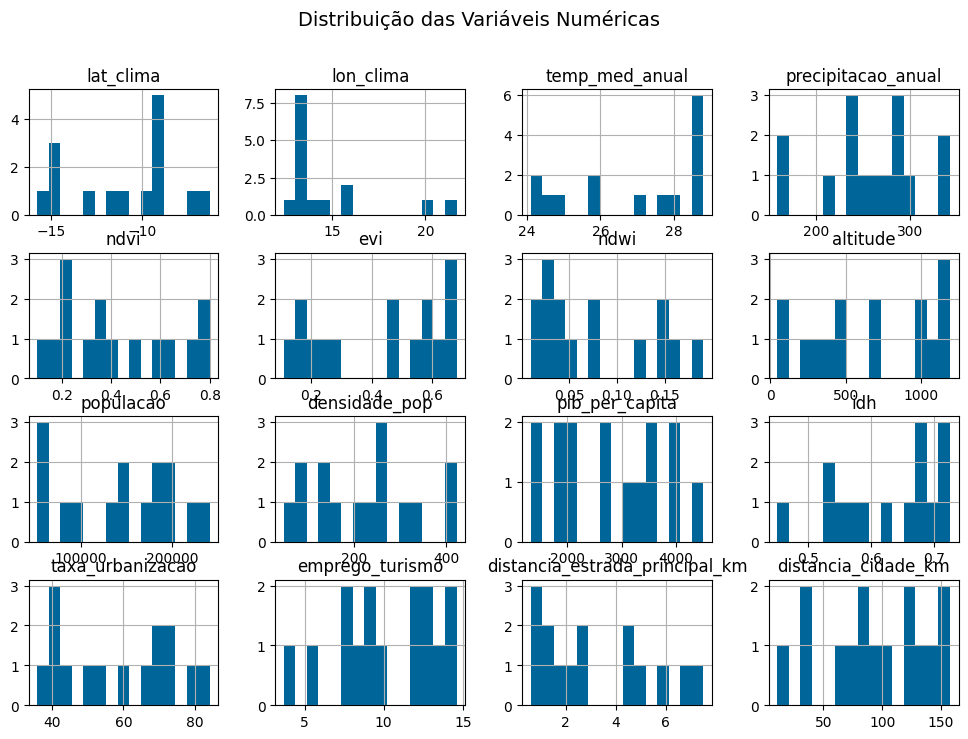

In [17]:
# 3️⃣ Análise exploratória dos dados
# ============================================================

print("📋 Informações gerais:")
df.info()

print("\n📊 Estatísticas descritivas:")
display(df.describe())

# Verificar valores ausentes
print("\n🚨 Valores ausentes:")
display(df.isnull().sum())

# Visualização rápida da distribuição das variáveis
df.hist(figsize=(12, 8), bins=15, color="#006699")
plt.suptitle("Distribuição das Variáveis Numéricas", fontsize=14)
plt.show()

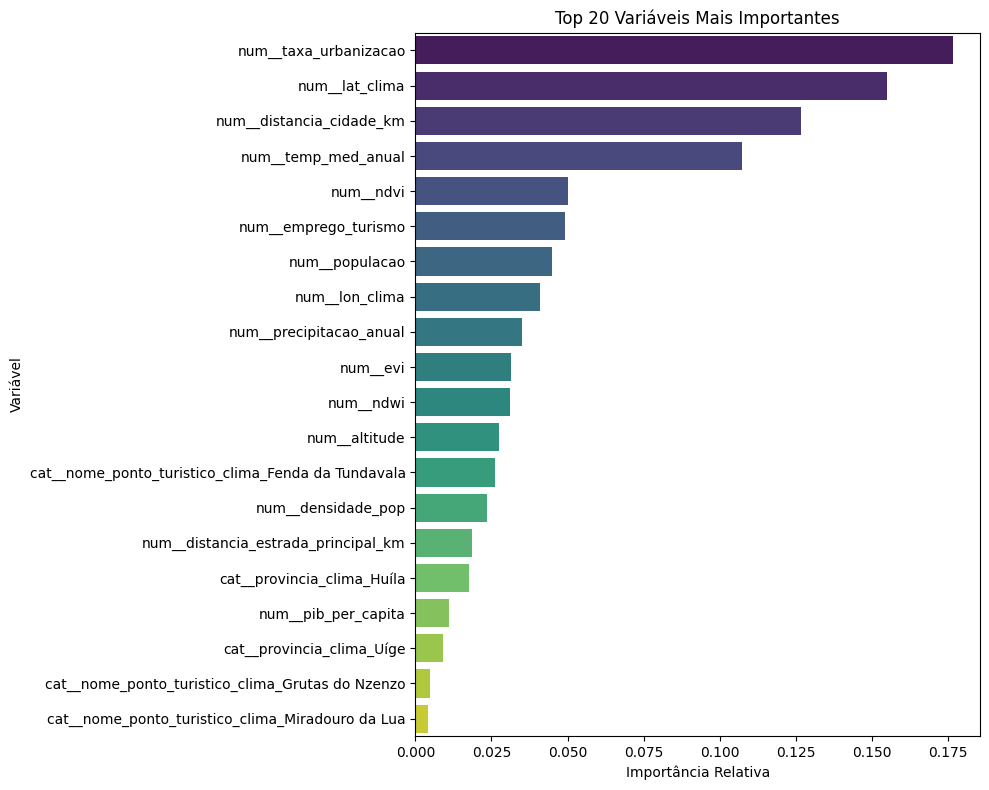

In [ ]:
# Avaliar variáveis mais importantes
# ============================================================
#  Avaliação da Importância das Variáveis
# ============================================================

# Extrair os nomes das features DEPOIS da transformação do pré-processador
feature_names_out = pipeline.named_steps['preprocessor'].get_feature_names_out()

# Extrair as importâncias do modelo treinado dentro do pipeline
importances = pipeline.named_steps['model'].feature_importances_

# Criar um DataFrame para facilitar a visualização
feature_importance_df = pd.DataFrame({
    'feature': feature_names_out,
    'importance': importances
}).sort_values('importance', ascending=False)

# --- Gerar o gráfico ---
plt.figure(figsize=(10, 8))
sns.barplot(x='importance', y='feature', data=feature_importance_df.head(20), palette='viridis')
plt.title("Top 20 Variáveis Mais Importantes")
plt.xlabel("Importância Relativa")
plt.ylabel("Variável")
plt.tight_layout()
plt.show()

In [15]:
# Salvar modelo
# ============================================================
# 5️⃣ Salvamento do Modelo (Pipeline Completo)
# ============================================================

# Definir o caminho e o nome do arquivo do modelo
MODEL_DIR = "../data/model_inputs"
MODEL_PATH = os.path.join(MODEL_DIR, "tourism_model.pkl")

# Criar o diretório se ele não existir
os.makedirs(MODEL_DIR, exist_ok=True)

# Salvar o objeto 'pipeline' inteiro. Ele contém tudo o que é necessário
# para fazer novas previsões: o pré-processador e o modelo treinado.
joblib.dump(pipeline, MODEL_PATH)

print(f"💾 Pipeline completo salvo com sucesso em: {MODEL_PATH}")

💾 Pipeline completo salvo com sucesso em: ../data/model_inputs\tourism_model.pkl


In [16]:
# Entrega esperada: models/tourism_model.pkl
# ============================================================
# 6️⃣ Verificação da Entrega
# ============================================================

# Este bloco apenas confirma que o arquivo foi criado no local esperado.
if os.path.exists(MODEL_PATH):
    print(f"\n✅ Entrega confirmada: o arquivo '{os.path.basename(MODEL_PATH)}' existe no diretório '{MODEL_DIR}'.")
else:
    print(f"\n🚨 Atenção: o arquivo do modelo não foi encontrado no local esperado.")


✅ Entrega confirmada: o arquivo 'tourism_model.pkl' existe no diretório '../data/model_inputs'.
